#### Import dependencies

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import math

### Problem 1
#### Provided below are functions to create training data, train the algorithm and test the algorithm

In [9]:
def simplest_training_data(n):

    w = 3
    b = 2
    x = np.random.uniform(0,1,n)
    y = 3*x+b+0.3*np.random.normal(0,1,n)
    return (x,y)


def simplest_training(n, k, eta):
    # Generating random training data
    x,y=simplest_training_data(n)
    # initialising weight randomly from a Gaussian Distribution
    w=np.random.normal(0,1,1)
    # initialising bias to be 0
    b=0
    Loss_values=[]
    epochs=[]
    
    # Iterating over k epochs
    for i in range (k):
        dL_dw=0
        dL_db=0
        Loss_function=0
        # Iterating over training data points
        for j in range (n):
            a=w*x[j]+b
            Loss_function+=(a-y[j])**2
            dL_dw=dL_dw+2*x[j]*(w*x[j]+b-y[j])
            dL_db=dL_db+2*(w*x[j]+b-y[j])
        # Performing gradient descent
        Loss_function=Loss_function/n
        Loss_values.append(Loss_function)
        epochs.append(i)
        dL_dw=dL_dw/n
        dL_db=dL_db/n
        w=w-(eta)*(dL_dw)
        b=b-(eta)*(dL_db)
    theta=(w,b)
    plt.plot(epochs,Loss_values)
    return theta

def simplest_testing(theta, x):
    w=theta[0]
    b=theta[1]
    y=[]
    for l in range(np.size(x)):
        z=w*x[l]+b
        y.append(z)
    return y

### Testing the algorithm

[array([2.08376253]), array([5.0448502]), array([8.00593787]), array([10.96702554]), array([13.92811321]), array([16.88920088]), array([19.85028855]), array([22.81137622]), array([25.77246389]), array([28.73355156])]


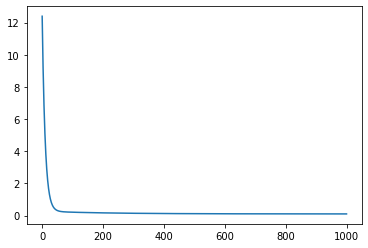

In [6]:
theta=simplest_training(100,1000,0.02)
x=[0,1,2,3,4,5,6,7,8,9]
y=simplest_testing(theta,x)
print(y)

In [8]:
theta=(3,2)
x=[0,1,2,3,4,5,6,7,8,9]
y=simplest_testing(theta,x)
print(y)

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]


Percentage accuracy between the two set of values is:  [76.9427616]


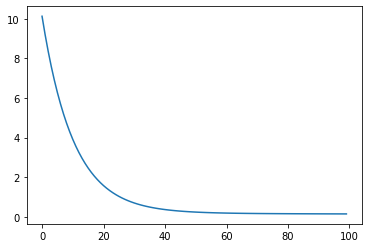

In [11]:
## Parameters for this test condition are: n=100, k=100, eta=0.02
theta=simplest_training(100,100,0.02)
x=[0,1,2,3,4,5,6,7,8,9]
y1=simplest_testing(theta,x)
theta_default=(3,2)
x=[0,1,2,3,4,5,6,7,8,9]
y2=simplest_testing(theta_default,x)
percent=0
for i in range(np.size(y)):
    percent+=100-(abs(y1[i]-y2[i])/y2[i])*100
percent=percent/(np.size(y))
print("Percentage accuracy between the two set of values is: ",percent)

Plot between lines generated by algorithm(RED) and y=3x+2(GREEN)


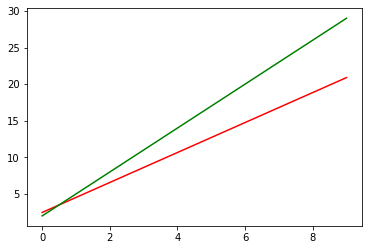

In [12]:
print("Plot between lines generated by algorithm(RED) and y=3x+2(GREEN)")
plt.plot(x,y1,'r-')
plt.plot(x,y2,'g-')

Percentage accuracy between the two set of values is:  [97.28590344]


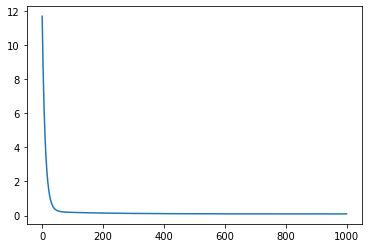

In [14]:
## Parameters for this test condition are: n=100, k=1000, eta=0.02
theta=simplest_training(100,1000,0.02)
x=[0,1,2,3,4,5,6,7,8,9]
y1=simplest_testing(theta,x)
theta_default=(3,2)
x=[0,1,2,3,4,5,6,7,8,9]
y2=simplest_testing(theta_default,x)
percent=0
for i in range(np.size(y)):
    percent+=100-(abs(y1[i]-y2[i])/y2[i])*100
percent=percent/(np.size(y))
print("Percentage accuracy between the two set of values is: ",percent)

Plot between lines generated by algorithm(RED) and y=3x+2(GREEN)


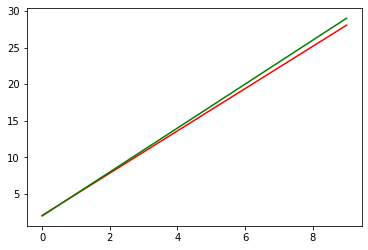

In [15]:
print("Plot between lines generated by algorithm(RED) and y=3x+2(GREEN)")
plt.plot(x,y1,'r-')
plt.plot(x,y2,'g-')

### Problem 2
#### Provided below are functions to create training data, train the algorithm and test the algorithm

In [16]:

def single_layer_training_data(trainset):
    n = 10
    if trainset == 1:
        # Linearly separable
        X = np.concatenate((np.random.normal((0,0),1,(n,2)), np.random.normal((10,10),1,(n,2))),axis=0)
        y = np.concatenate((np.ones(n), np.zeros(n)),axis=0)
    
    elif trainset == 2:
        # Not Linearly Separable
        X = np.concatenate((np.random.normal((0,0),1,(n,2)), np.random.normal((10,10),1,(n,2)), np.random.normal((10,0),1,(n,2)), np.random.normal((0,10),1,(n,2))),axis=0)
        y = np.concatenate((np.ones(2*n), np.zeros(2*n)), axis=0)
    
    else:
        print("function single_layer_training_data undefined for input", trainset)
        sys.exit()

    return (X,y) 

def single_layer_training(k, eta, trainset):
    w=np.random.normal(0,1,2)
    w1=w[0]
    w2=w[1]
    b=0
    X,y=single_layer_training_data(trainset)
    Loss_values=[]
    epochs=[]
    for i in range (k):
        dL_dw1=0
        dL_dw2=0
        dL_db=0
        Loss_function=0
        for j in range (20):
            sigmoid=1/(1+np.exp(-(w1*X[j][0]+w2*X[j][1]+b)))
            Loss_function+=-(y[j]*math.log(sigmoid)+(1-y[j])*(math.log(1-sigmoid)))
            dL_dw1+=X[j][0]*((sigmoid-(y[j])))
            dL_dw2+=X[j][1]*((sigmoid-(y[j])))
            dL_db=dL_db+(sigmoid-y[j])
        Loss_function=Loss_function/20
        Loss_values.append(Loss_function)
        epochs.append(i)
        dL_dw1=dL_dw1/20
        dL_dw2=dL_dw2/20
        dL_db=dL_db/20
        w1=w1-(eta)*(dL_dw1)
        w2=w2-(eta)*(dL_dw2)
        b=b-(eta)*(dL_db)
    theta=[w1,w2,b]
    plt.plot(epochs,Loss_values)
    return theta

def single_layer_testing(theta, X):
    y=[]
    x1=[]
    x2=[]
    for i in range (np.size(X,0)):
        w1=theta[0]
        w2=theta[1]
        b=theta[2]
        t=sigmoid=1/(1+np.exp(-(w1*X[i][0]+w2*X[i][1]+b)))
        y.append(t)
        print("The point (",X[i][0],",",X[i][1],") has probability ",t)
        x1.append(X[i][0])
        x2.append(X[i][1])
    
    plt.plot(x1,x2,'.')
    plt.plot(y,'-')
    return y

### Testing the algorithm

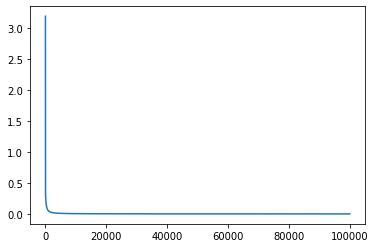

In [17]:
theta=single_layer_training(100000,0.03,1)

The point ( -2.1590077493522233 , -0.43712063538827983 ) has probability  0.9999774794331435
The point ( 0.5530508808945773 , 0.7772779514932303 ) has probability  0.998946406511702
The point ( -0.7538390643200602 , 0.46904676975185405 ) has probability  0.9997953724289432
The point ( -0.34152248162696497 , -0.15781911712422048 ) has probability  0.9998038099292973
The point ( -1.8887083124309128 , 1.1286555405609389 ) has probability  0.999899128516153
The point ( 1.6043732196142737 , -0.4799144062475398 ) has probability  0.9987685128146699
The point ( -0.16100637681167257 , 1.3791673738417436 ) has probability  0.9992198609473554
The point ( -0.5267183502203296 , 0.34469119084325084 ) has probability  0.9997628598314522
The point ( -0.021938158950610197 , -0.32922077983737374 ) has probability  0.9997579020468349
The point ( 0.3304994227044243 , 0.5155344395976708 ) has probability  0.9993217830959964
The point ( 9.200761975534455 , 10.674206357407067 ) has probability  4.2539101933

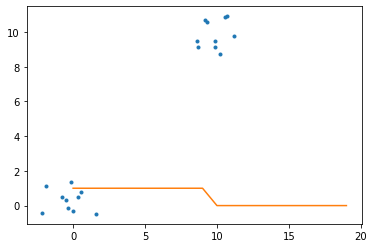

In [18]:
output=single_layer_testing(theta,single_layer_training_data(1)[0])

### Problem 3
#### Provided below are functions to create training data, train the algorithm and test the algorithm

In [19]:

def pca_training_data(n, sigma):
    m = 1
    b = 1
    x1 = np.random.uniform(0,10,n)
    x2 = m*x1+b
    X = np.array([x1,x2]).T
    X += np.random.normal(0,sigma,X.shape)
    return X

def pca_training(k, eta, n, sigma):
    x=pca_training_data(n,1)
    w=np.random.normal(0,1,4)
    w11=w[0]
    w12=w[1]
    w21=w[2]
    w22=w[3]
    b11=0
    b21=0
    b22=0
    theta=[]
    for i in range (k):
        theta_prev=theta
        dL_dw11=0
        dL_dw12=0
        dL_dw21=0
        dL_dw22=0
        dL_db11=0
        dL_db21=0
        dL_db22=0
        for j in range (n):
            h=w11*x[j][0]+w12*x[j][1]+b11
            z1=w21*h+b21
            z2=w22*h+b22
            dL_dw11+=2*(x[j][0]*w21)*(z1-x[j][0])+2*(x[j][0]*w22)*(z2-x[j][1])
            dL_dw12+=2*(x[j][1]*w21)*(z1-x[j][0])+2*(x[j][1]*w22)*(z2-x[j][1])
            dL_db11+=2*w21*(z1-x[j][0])+2*w22*(z2-x[j][1])
            dL_dw21=2*(z1-x[j][0])*h
            dL_dw22=2*(z2-x[j][1])*h
            dL_db21=2*(z1-x[j][0])
            dL_db22=2*(z2-x[j][1])
        dL_dw11=dL_dw11/n
        dL_dw12=dL_dw12/n
        dL_dw21=dL_dw21/n
        dL_dw22=dL_dw22/n
        dL_db11=dL_db11/n
        dL_db21=dL_db21/n
        dL_db22=dL_db22/n
        w11=w11-(eta)*(dL_dw11)
        w12=w12-(eta)*(dL_dw12)
        w21=w21-(eta)*(dL_dw21)
        w22=w22-(eta)*(dL_dw22)
        b11=b11-(eta)*(dL_db11)
        b21=b21-(eta)*(dL_db21)
        b22=b22-(eta)*(dL_db22)
        theta=[w11,w12,b11,w21,w22,b21,b22]
        if theta==theta_prev:
            print("Convergence at ",k," epoch.")
            break
    return theta

def pca_test(theta, X):
    l=[]
    w11=theta[0]
    w12=theta[1]
    b11=theta[2]
    w21=theta[3]
    w22=theta[4]
    b21=theta[5]
    b22=theta[6]
    Z1=[]
    Z2=[]
    XX1=[]
    XX2=[]
    percent1=0
    percent2=0
    for i in range(np.size(X,0)):
        h = w11*X[i][0] + w12*X[i][1] + b11
        z1 = w21*h + b21
        z2 = w22*h + b22
        Z1.append(z1)
        Z2.append(z2)
        XX1.append(X[i][0])
        XX2.append(X[i][1])
        per1=100-((abs(X[i][0]-z1)/X[i][0])*100)
        percent1+=100-((abs(X[i][0]-z1)/X[i][0])*100)
        per2=100-((abs(X[i][1]-z2)/X[i][1])*100)
        percent2+=100-((abs(X[i][1]-z2)/X[i][1])*100)
        print(" X1=",X[i][0]," z1= ",z1," accuracy=",per1," & X2=",X[i][1]," z2= ",z2," accuracy= ",per2,"%")
    percent1=percent1/(np.size(X,0))
    percent2=percent2/(np.size(X,0))
    print("The overall accuracy percentage of the algorithm for x1,z1=",percent1," and for x2,z2=",percent2)
    # plt.plot(XX1,XX2,'bx')
    # plt.plot(Z1,Z2,'ro')
    Z=[Z1,Z2]
    return np.transpose(Z)

### Testing the algorithm


In [24]:
X=pca_training_data(10,0)
t=pca_training(300, 0.01, 100, 0)
a=pca_test(t, [[1,2], [4,5], [10, 3]])

 X1= 1  z1=  1.057852543941015  accuracy= 94.21474560589851  & X2= 2  z2=  2.1606002338849537  accuracy=  91.96998830575231 %
 X1= 4  z1=  2.547645568250897  accuracy= 63.69113920627243  & X2= 5  z2=  5.69151138051854  accuracy=  86.16977238962919 %
 X1= 10  z1=  2.588437480063028  accuracy= 25.884374800630283  & X2= 3  z2=  5.788190995578939  accuracy=  7.060300147368707 %
The overall accuracy percentage of the algorithm for x1,z1= 61.26341987093374  and for x2,z2= 61.73335361425006
